**Can Linear Regression solve the Classification Problem**
- No, Linear regression produces continuous outputs that can fall outside the 0-1 range required for probability. 
- Further it is overly sensitive to outliers which can significantly skew the best fit line and hence the model predictions. 

**Logistic Regression** is used to solve a **binary classification** problem ( say you want to predict a categorical feature like 0  or 1 )
- Logistic regression is based on an activation function called as Sigmoid function. 
- It is like we create a best fit line in the Logistic regression and then apply an activation function on top of it. 
- The sigmoid function ultimately gives us the the outputs in the range of 0 to 1 which represents simply the probability of the events. Wehn you apply some threhold on these probabilities say greater than 0.80 or 0.60 you will consider final output as 1 else it will be 0. This ultimately helps in the classification. 

### **Logistic Regression : Practical**

### **Dataset** :

https://www.kaggle.com/datasets/mathchi/diabetes-data-set/code

**About this dataset**

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.shape

(768, 9)

In [11]:
print("\nColumns:", list(df.columns))


Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [12]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
print("Descriptive stats (numeric):")
print(df.describe().T)

Descriptive stats (numeric):
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.00

In [14]:
target_col = "Outcome"
X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
print("\nClass distribution (counts):")
print(y.value_counts())
## clearly the dataset is imbalanced but we solve this in second phase first we make a basic model


Class distribution (counts):
Outcome
0    500
1    268
Name: count, dtype: int64


In [16]:
zero_counts = (X == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [17]:
print(zero_counts[zero_counts > 0].sort_values(ascending=False))

Insulin          374
SkinThickness    227
Pregnancies      111
BloodPressure     35
BMI               11
Glucose            5
dtype: int64


In [ ]:
## perform imputation on Glucose, BloodPressure, SkinThickness, Insulin, BMI

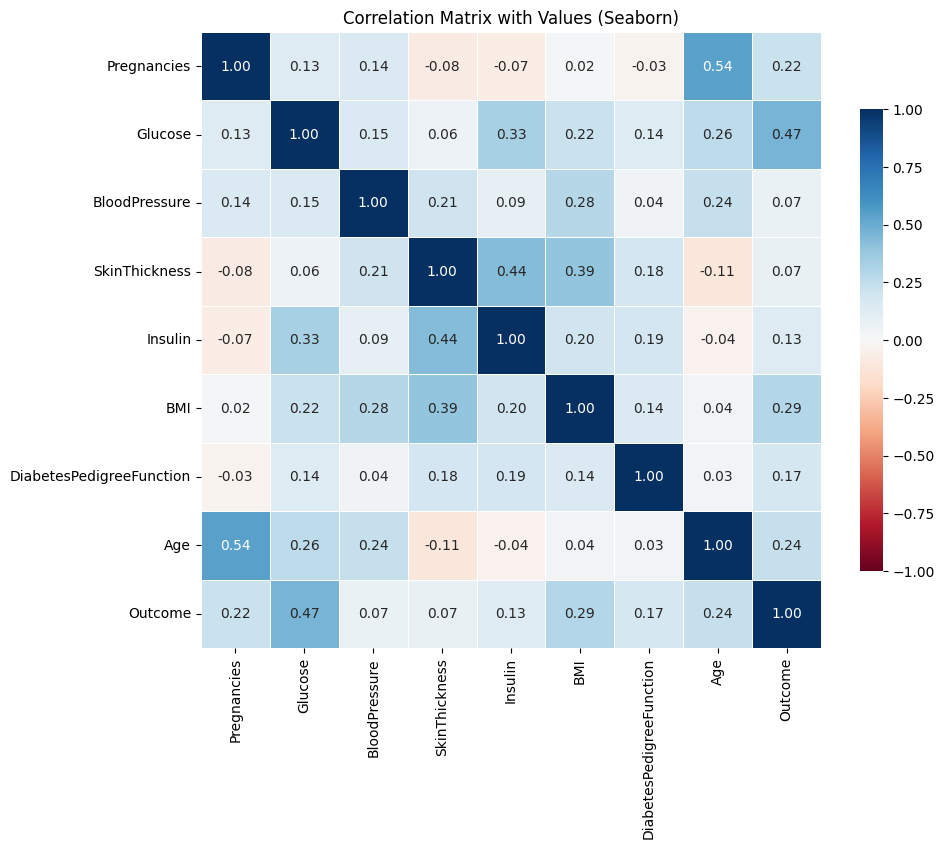

In [18]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr, annot=True, cmap='RdBu',fmt=".2f",vmin=-1,vmax=1,
    center=0,linewidths=.5,cbar_kws={"shrink": .75}
)
plt.title("Correlation Matrix with Values (Seaborn)")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
import numpy as np

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y ## STRATIFY IS IMPORTANT SO THAT YOUR TRAINING AND TEST SETS ARE BALANCED ACROSS 0 AND 1 OUTCOMES 
)

In [23]:
# case 1 with stratify
# 500 - 0, 90% of 500 --> 450(train), 50 is for left test
# 300 - 1, 90% of 300 --> 270(train), 30 is for left test


# # Case 2 with random
# 500 - 0, 490(train), 10 is for left test
# 300 - 1, 100(train), 200 is for left test



In [24]:
print(f"After split -> X_train: {X_train.shape}, X_test: {X_test.shape}")

After split -> X_train: (691, 8), X_test: (77, 8)


In [25]:
# Step 1 : do the imputation
columns_with_zero = ["Insulin", "SkinThickness", "BloodPressure", "BMI", "Glucose"]

zero_missing_cols = [c for c in columns_with_zero if c in X_train.columns]
print("Columns with 0 for (treating 0 values as missing):", zero_missing_cols)

Columns with 0 for (treating 0 values as missing): ['Insulin', 'SkinThickness', 'BloodPressure', 'BMI', 'Glucose']


In [26]:
# Step 2 : scaling
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
remaining_cols = [c for c in numeric_cols]
print(remaining_cols)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [27]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.compose import ColumnTransformer

In [28]:
transformers = []

if zero_missing_cols:
    impute_then_scale = SklearnPipeline([
        ("imputer_zero_as_missing", SimpleImputer(missing_values=0, strategy="median")),
        ("scaler", StandardScaler())
    ])
    transformers.append(("impute_scale", impute_then_scale, zero_missing_cols))

    # numerical colms & not part of imputation
    remaining_after_impute = [c for c in remaining_cols if c not in zero_missing_cols]
    if remaining_after_impute:
        transformers.append(("scaler_all", SklearnPipeline([("scaler", StandardScaler())]), remaining_after_impute))

else :
    transformers.append(("scaler_all", SklearnPipeline([("scaler", StandardScaler())]), remaining_cols))


In [29]:
preprocessor = ColumnTransformer(transformers=transformers, remainder="drop")
# remainder="drop" specifies what should happend to any columns in our dataset that 
# were not explicitly included in any of transformers we defined

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf = LogisticRegression(solver="liblinear", max_iter=1000, random_state=42)

In [32]:
pipeline = SklearnPipeline([("preprocessor", preprocessor), ("clf", clf)])